In [1]:
from snn_200_poisson import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import time
import numpy as np
import os
import multiprocessing

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train[(y_train == 0) | (y_train == 5)]
# X_train = X_train[:200]
# y_train = y_train[:200]

print(len(X_train))

11344


In [44]:
current_time = time.time()
local_time = time.localtime(current_time)
formatted_time = time.strftime('%d_%m_%Y_%H%M%S', local_time)

dir_name = f'data_{formatted_time}'

In [45]:
model = Model(784, 100, dir_name, True, True)

In [46]:
features = model.evaluate(X_train, None)

100%|██████████| 200/200 [02:07<00:00,  1.57it/s]


In [47]:
reduced_data = PCA(n_components=2).fit_transform(features)

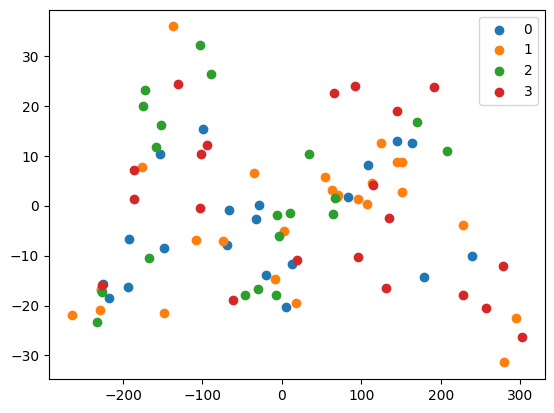

In [48]:
for digit in range(0, 4):
    pca_1 = reduced_data[np.where(y_train==digit)].T[0]
    pca_2 = reduced_data[np.where(y_train==digit)].T[1]
    
    plt.scatter(pca_1, pca_2, label=f'{digit}')

plt.legend()

In [49]:
os.mkdir(dir_name)
os.mkdir(dir_name + '/weights')
model.train(X_train, 10)

 60%|██████    | 6/10 [15:43<10:28, 157.21s/it]


KeyboardInterrupt: 

In [10]:
features = model.evaluate(X_train, 'data_26_07_2024_235734/chk_13.b2')

SystemError: deallocated bytearray object has exported buffers

MemoryError: 

In [13]:
reduced_data = PCA(n_components=2).fit_transform(features)

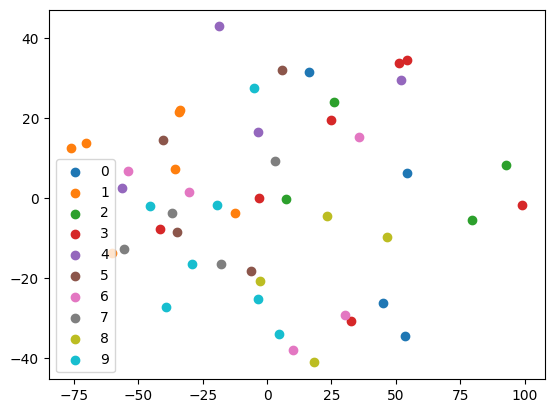

In [14]:
for digit in range(0, 10):
    pca_1 = reduced_data[np.where(y_train==digit)].T[0]
    pca_2 = reduced_data[np.where(y_train==digit)].T[1]
    
    plt.scatter(pca_1, pca_2, label=f'{digit}')

plt.legend()

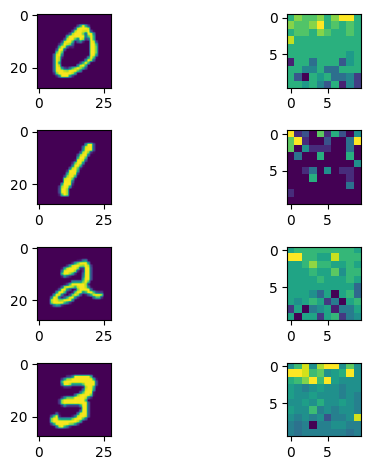

In [ ]:
fig, axs = plt.subplots(4, 2)

for i, pic, rates in zip(range(0, 4), train_pics, features):
    axs[i, 0].imshow(pic)
    axs[i, 1].imshow(rates.reshape((10, 10)))

plt.tight_layout()

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)